In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [15]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [16]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# query results for measurements
measurement_results = session.query(measurements.station, measurements.date, measurements.prcp, measurements.tobs)


In [18]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [60]:
# query results for stations
stations_results = session.query(stations.station, stations.name, stations.latitude, 
                                 stations.longitude, stations.elevation, measurements.station,
                                 measurements.date, measurements.prcp, measurements.tobs)



In [61]:
# join the result sets together 
sel = [measurement.station, measurement.date, measurement.prcp, measurement.tobs, stations.station,
       stations.name, stations.latitude, stations.longitude, stations.elevation]
joined_station_measures = session.query(*sel).filter(measurement.station==stations.station)


In [150]:
# make df from joined result
df = pd.DataFrame(joined_station_measures[:], columns=['station','date','prcp','tobs','station','name',
                                                       'latitude','longitude', 'elevation'])
#sort df by date descending to see most recent date at top
df_date_range = df.sort_values("date", ascending=False)

df_date_range.head(20)

,station,date,prcp,tobs,station,name,latitude,longitude,elevation
19549,USC00516128,2017-08-23,0.45,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
12186,USC00519523,2017-08-23,0.08,82.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
2723,USC00519397,2017-08-23,0.00,81.0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
7634,USC00514830,2017-08-23,0.00,82.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
12185,USC00519523,2017-08-22,0.00,82.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
2722,USC00519397,2017-08-22,0.00,82.0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
19548,USC00516128,2017-08-22,0.50,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
7633,USC00514830,2017-08-21,0.02,79.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
19547,USC00516128,2017-08-21,0.56,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
12184,USC00519523,2017-08-21,NaN,82.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5


# Exploratory Climate Analysis

In [248]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year previous to the last data point in the database
last_date= dt.datetime(2017, 8, 24)
first_date= dt.datetime(2016, 8, 22)
# Perform a query to retrieve the data and precipitation scores
sel=(measurement.date, measurement.prcp)
rain_yr = session.query(*sel).filter(measurement.date>first_date,
                                    measurement.date<last_date)
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_yr_df = pd.DataFrame(rain_yr[:], columns =['date','prcp'])

#remove any NaN values from rain_yr_df
clean_rain_yr_df = rain_yr_df.dropna()

# Sort the dataframe by date
rain_yr_df_sorted = clean_rain_yr_df.sort_values('date', ascending=True)
rain_yr_df_sorted 

rain_yr_df_index = rain_yr_df_sorted.set_index('date') 

C:\Users\shona\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 432x288 with 0 Axes>

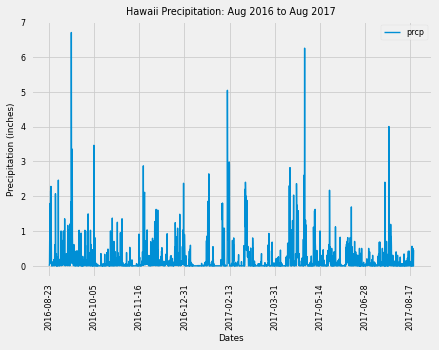

In [268]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = [6,4]) 
rain_yr_df_index.plot(rot=90)
plt.xlabel('Dates')
plt.ylabel('Precipitation (inches)')
plt.title("Hawaii Precipitation: Aug 2016 to Aug 2017")
plt.savefig("images/Precipitation_Hawaii.png")
plt.show()

In [251]:
# Given error, plot another way as well
# set x and y axis from rain_yr_sorted_df
x_axis = rain_yr_df_sorted ['date'].to_list()
y_axis = rain_yr_df_sorted ['prcp'].to_list()

#use loop to get a sample of x_axis dates for display
counter = 0
x_ticks = []
for x in x_axis:
    counter +=1
    if counter == 224:
        date= x
        x_ticks.append(date)
        counter-=224
    elif counter!=224:
        date=""
        x_ticks.append(date)
#check lenght of x_ticks matches data points in x_axis
print("Number of x_ticks labels: "+str(len(x_ticks)))
print("Number of x_axis data points:"+str(len(x_axis)))

Number of x_ticks labels: 2021
Number of x_axis data points:2021


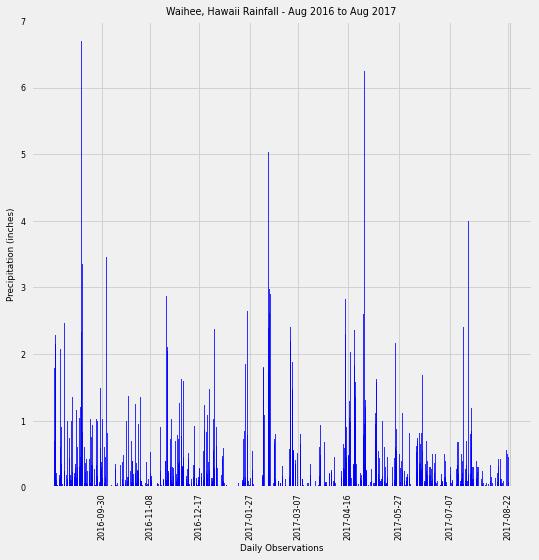

In [254]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.subplots(figsize=(8,8))
plt.bar(x_axis, y_axis, color="blue", alpha=0.8, align="center")
plt.xticks(x_ticks, rotation='vertical')
plt.ylim(0, 7)
plt.ylabel("Precipitation (inches)")
plt.xlabel("Daily Observations")
plt.title("Hawaii Rainfall - Aug 2016 to Aug 2017")
#plt.xticks([])
plt.savefig("images/Precipitation_inches.png")
plt.show()

In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
descriptive_rain=rain_yr_df_sorted.describe()
descriptive_rain

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [98]:
# Design a query to show how many stations are available in this dataset?
stations = df['name'].unique()
print('The number of stations available in the dataset is: '+ str(len(stations)))

The number of stations available in the dataset is: 9


In [106]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_name = df.groupby("name")
station_name_count = (station_name["name"]).count()
station_name_count = station_name_count.sort_values()  

station_name_count

name
UPPER WAHIAWA 874.3, HI US                 511
PEARL CITY, HI US                         1372
HONOLULU OBSERVATORY 702.2, HI US         1979
KUALOA RANCH HEADQUARTERS 886.9, HI US    2202
MANOA LYON ARBO 785.2, HI US              2612
WAIMANALO EXPERIMENTAL FARM, HI US        2669
KANEOHE 838.1, HI US                      2709
WAIKIKI 717.2, HI US                      2724
WAIHEE 837.5, HI US                       2772
Name: name, dtype: int64

In [243]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = df.loc[df["name"]=="WAIHEE 837.5, HI US",:]
most_active_describe = most_active.describe()
most_active_describe

,prcp,tobs,latitude,longitude,elevation
count,2772.000000,2772.000000,2.772000e+03,2772.00000,2772.0
mean,0.212352,71.663781,2.145167e+01,-157.84889,32.9
std,0.543312,4.357642,3.553355e-15,0.00000,0.0
min,0.000000,54.000000,2.145167e+01,-157.84889,32.9
25%,0.000000,69.000000,2.145167e+01,-157.84889,32.9
50%,0.040000,72.000000,2.145167e+01,-157.84889,32.9
75%,0.190000,74.000000,2.145167e+01,-157.84889,32.9
max,9.640000,85.000000,2.145167e+01,-157.84889,32.9


In [145]:
most_active_max = round(most_active["tobs"].max(),2)
most_active_min = round(most_active["tobs"].min(),2)
most_active_avg = round(most_active["tobs"].mean(),2)

print(f'The max temp is {most_active_max} the min temp is {most_active_min} and the average temp is {most_active_avg}')


The max temp is 85.0 the min temp is 54.0 and the average temp is 71.66


In [159]:
# Choose the station with the highest number of temperature observations.
#check to see if there are any NaN values in the df for 'tobs'
temp_NaN = df['tobs'].isnull().values.any()
temp_NaN


False

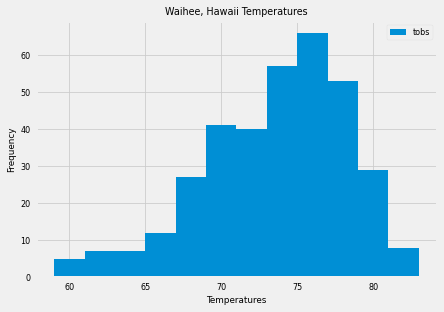

<Figure size 460.8x316.8 with 0 Axes>

In [264]:
# Query the last 12 months of temperature observation data for this station 
#and plot the results as a histogram
most_active_station='USC00519281'
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(measurement.tobs).\
    filter(measurement.station == most_active_station).\
    filter(measurement.date >= prev_year).all()
most_active_temp_df = pd.DataFrame(results, columns=['tobs'])
most_active_temp_df.plot.hist(bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperatures")
plt.title("Waihee, Hawaii Temperatures")
plt.savefig("images/Temps_Waihee.png")
plt.show()
plt.tight_layout()


## Bonus Challenge Assignment

In [273]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
start_date = '%2017-%2-%1'
end_date ='%2016-%2-%7'
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).\
        filter(measurements.date >= start_date).filter(measurements.date <= end_date).all()

# function usage example
print(calc_temps('2017-02-01', '2017-02-07'))

[(59.0, 69.42222222222222, 80.0)]


In [277]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start = dt.date(2017, 2, 1) - dt.timedelta(days=365)
trip_end = dt.date(2017, 2, 7) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(trip_start.strftime("%Y-%m-%d"), trip_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

56.0 69.0 76.0


C:\Users\shona\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


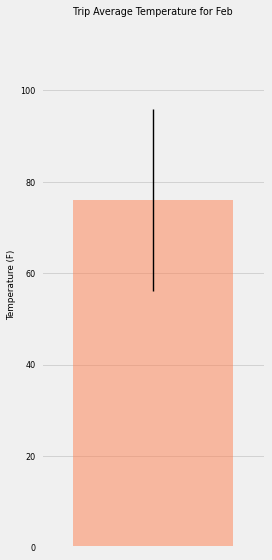

In [278]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin
bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Average Temperature for Feb", ylabel="Temperature (F)")
ax.margins(.2, .2)
fig.tight_layout()
fig.show()

In [284]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
